In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

In [74]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df_apoptosis = pd.read_csv('manual_sam_not_rescaled_Apoptosis_with_bshape.csv', index_col=None)
df_apoptosis['label'] = 0
"""
df_necrosis = pd.read_csv('not_rescaled_Necrosis_with_bshape.csv', index_col=None)
df_necrosis['label'] = 2
"""
df_necroptosis = pd.read_csv('manual_sam_not_rescaled_Necroptosis_with_bshape.csv', index_col=None)
df_necroptosis['label'] = 1

df = pd.concat([df_apoptosis, df_necroptosis], axis=0, ignore_index=True)

In [75]:
time_list = [str(k*0.5).zfill(4) for k in range(36)]
props = ['volume', 'solidity', 'mean_RI', 'ri_above_1.35_volume', 'extent', 'axis_major_length', 'inertia_tensor_eigvals-0',
         'inertia_tensor_eigvals-1', 'inertia_tensor_eigvals-2']
extracted = pd.DataFrame()

for time in time_list:
    # extracted[time+'h_mass'] = df[time+'h_mean_RI'] * df[time+'h_volume_sum']
    extracted[time+'h_mean_RI'] = df[time+'h_mean_RI']
    for p in props:
        extracted[time+'h_'+p] = df[time+'h_'+p]

init_vol = df['00.0h_volume']

for time in time_list:
    extracted[time+'h_high_ri_ratio'] = extracted[time+'h_ri_above_1.35_volume'] / extracted[time+'h_volume']
    extracted[time+'h_volume'] = extracted[time+'h_volume'] / init_vol
    extracted = extracted.drop(columns=[time+'h_ri_above_1.35_volume'])
    
# labels
labels = df['label']

C:\Users\김민욱\AppData\Local\Temp\ipykernel_22908\3313150224.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extracted[time+'h_'+p] = df[time+'h_'+p]
C:\Users\김민욱\AppData\Local\Temp\ipykernel_22908\3313150224.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extracted[time+'h_'+p] = df[time+'h_'+p]
C:\Users\김민욱\AppData\Local\Temp\ipykernel_22908\3313150224.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

In [76]:
extracted

,00.0h_mean_RI,00.0h_volume,00.0h_solidity,00.0h_extent,00.0h_axis_major_length,00.0h_inertia_tensor_eigvals-0,00.0h_inertia_tensor_eigvals-1,00.0h_inertia_tensor_eigvals-2,00.5h_mean_RI,00.5h_volume,...,13.0h_high_ri_ratio,13.5h_high_ri_ratio,14.0h_high_ri_ratio,14.5h_high_ri_ratio,15.0h_high_ri_ratio,15.5h_high_ri_ratio,16.0h_high_ri_ratio,16.5h_high_ri_ratio,17.0h_high_ri_ratio,17.5h_high_ri_ratio
0,1.335937,1.0,0.674394,0.308573,140.679220,1773.564091,1000.468480,794.968285,1.334858,1.560777,...,0.069855,0.093062,0.060389,0.083621,0.056336,0.070138,0.074102,0.043150,0.055723,0.057712
1,1.329740,1.0,0.604583,0.273796,193.470078,2332.161804,1878.974700,468.069400,1.333362,1.722295,...,0.043960,0.027580,0.062785,0.069826,0.050983,0.071885,0.075902,0.075183,0.103506,0.107635
2,1.329381,1.0,0.304138,0.125838,189.570793,2397.252384,1804.650873,608.194713,1.330155,2.686031,...,0.338954,0.222598,0.268570,0.225437,0.129183,0.127555,0.116915,0.073389,0.088615,0.096139
3,1.337847,1.0,0.405781,0.152003,226.091398,3444.839591,2563.133474,896.241023,1.333574,1.483533,...,0.267151,0.256942,0.283951,0.315736,0.235690,0.238154,0.201475,0.143069,0.118835,0.117899
4,1.329453,1.0,0.333356,0.082795,386.847525,7805.615678,7486.693563,327.208466,1.331039,2.404281,...,0.008797,0.048491,0.015496,0.040462,0.018224,0.038021,0.060030,0.030737,0.050580,0.037765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,1.333212,1.0,0.616480,0.259800,176.278970,2421.616997,1565.000785,879.190240,1.333562,1.315571,...,0.014280,0.014656,0.013428,0.016358,0.016956,0.014765,0.015526,0.012844,0.012660,0.010444
113,1.329208,1.0,0.485378,0.215982,175.979293,2027.631046,1557.361139,488.121037,1.329843,1.659368,...,0.012939,0.013826,0.012537,0.016961,0.018632,0.016712,0.015761,0.012830,0.017367,0.013214
114,1.336572,1.0,0.429653,0.140397,246.919118,4024.796997,3059.161814,987.053751,1.337377,1.043214,...,0.035504,0.032373,0.038221,0.037173,0.043069,0.043366,0.051165,0.046280,0.039182,0.032506
115,1.329605,1.0,0.549020,0.254587,176.298150,2377.791171,1563.489286,833.176672,1.329783,1.357596,...,0.021445,0.023930,0.022044,0.027870,0.029594,0.027440,0.026006,0.019832,0.024057,0.019529


In [79]:
x = extracted.copy()
y = labels.copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

In [80]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', max_depth=10, n_estimators=10)
clf_xgb.fit(x_train, y_train, verbose=True, eval_set=[(x_test, y_test)])

[0]	validation_0-logloss:0.55584
[1]	validation_0-logloss:0.50595
[2]	validation_0-logloss:0.47692
[3]	validation_0-logloss:0.46747
[4]	validation_0-logloss:0.43550
[5]	validation_0-logloss:0.41435
[6]	validation_0-logloss:0.38712
[7]	validation_0-logloss:0.38489
[8]	validation_0-logloss:0.37369
[9]	validation_0-logloss:0.36733


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

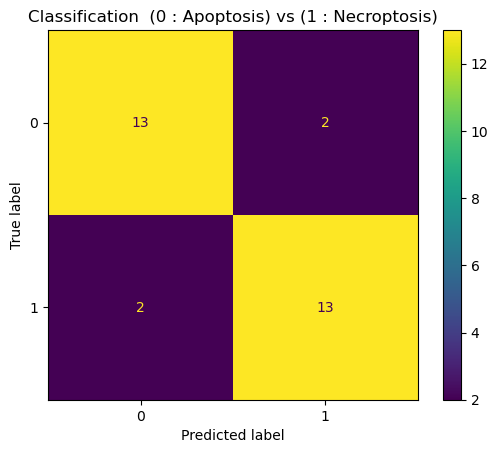

In [89]:
predictions = clf_xgb.predict(x_test)

cm = confusion_matrix(y_test, predictions, labels=clf_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_xgb.classes_)
disp.plot()
plt.title('Classification  (0 : Apoptosis) vs (1 : Necroptosis)')
plt.show()

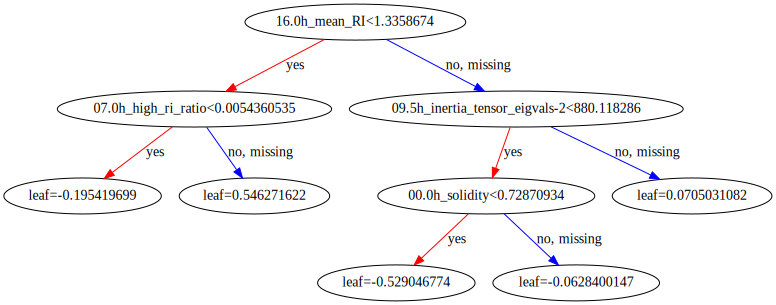

In [90]:
xgb.to_graphviz(clf_xgb, num_trees=0)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

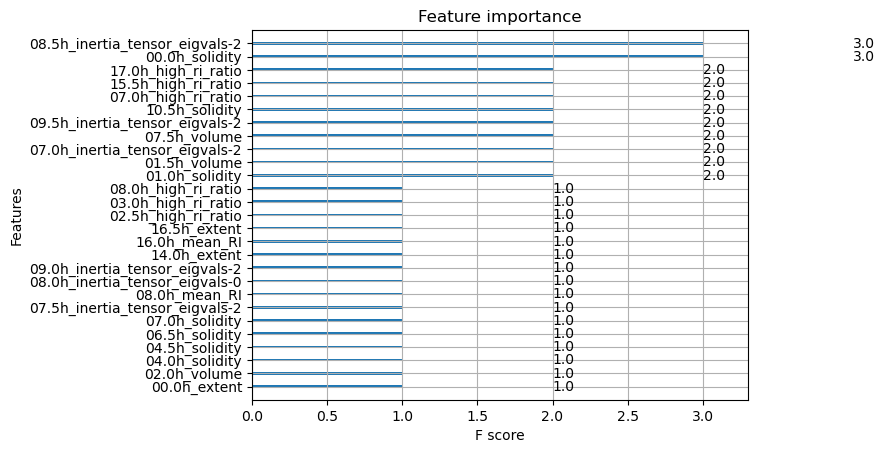

In [91]:
xgb.plot_importance(clf_xgb)

In [18]:
import ipywidgets as widgets

tt = widgets.IntSlider(min=0, max=35)

def plot(t):
    for i in range(extracted.shape[0]):
        plt.scatter(x=extracted.iloc[i][[str(t*0.5).zfill(4)+'h_solidity']].values, y=extracted.iloc[i][[str(t*0.5).zfill(4)+'h_mean_RI']], c=labels[i])
    
    plt.xlabel('solidity')
    plt.ylabel('mean_RI')
    plt.xlim(0, 1)
    plt.ylim(1.3, 1.4)
    plt.title('time : '+ str(t*0.5).zfill(4) +'h' + '   ' + '(blue : apoptosis, green : necroptosis)')
widgets.interact(plot, t=tt)

interactive(children=(IntSlider(value=0, description='t', max=35), Output()), _dom_classes=('widget-interact',…

<function __main__.plot(t)>

<h3> Feature plot - along time </h3>

1. Apoptosis

In [68]:
time_list = [str(k*0.5).zfill(4) for k in range(36)]
props = ['mean_RI']
feature = pd.DataFrame()
feature_mean = pd.DataFrame()

for time in time_list:
    # feature[time+'h_high_ri_ratio'] = df_apoptosis[time+'h_ri_above_1.35_volume'] / df_apoptosis[time+'h_volume']
    for p in props:
        feature[time+'h_'+p] = df_apoptosis[time+'h_'+p]
        feature_mean[time+'h_mean_'+p] = [np.mean(feature[time+'h_'+p])]
        
# label
feature_mean['label'] = 'blue'

# extraction for plot
y_apoptosis = np.array(feature_mean.iloc[0, :36])


2. Necroptosis

In [69]:
time_list = [str(k*0.5).zfill(4) for k in range(36)]
props = ['mean_RI']
feature = pd.DataFrame()
feature_mean = pd.DataFrame()

for time in time_list:
    # feature[time+'h_high_ri_ratio'] = df_necroptosis[time+'h_ri_above_1.35_volume'] / df_necroptosis[time+'h_volume']
    for p in props:
        feature[time+'h_'+p] = df_necroptosis[time+'h_'+p]
        feature_mean[time+'h_mean_'+p] = [np.mean(feature[time+'h_'+p])]
        
# label
feature_mean['label'] = 'green'
feature_mean

# extraction for plot
y_necroptosis = np.array(feature_mean.iloc[0, :36])

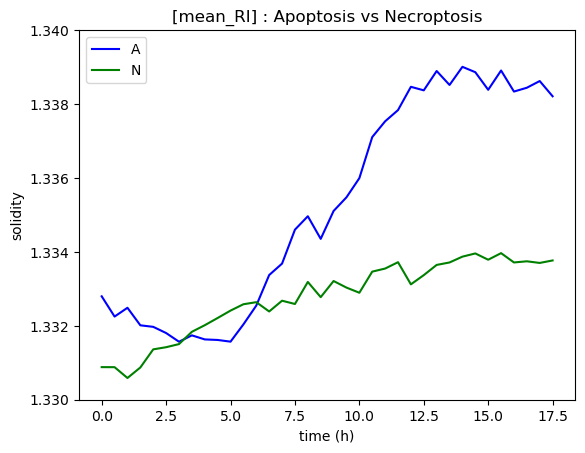

In [73]:
x = 0.5 * np.arange(0, 36)
fig, axes = plt.subplots(1,1)
axes.plot(x, y_apoptosis, color='blue')
axes.plot(x, y_necroptosis, color='green')
axes.set_ylim(1.33, 1.34)
axes.set_title('[mean_RI] : Apoptosis vs Necroptosis')
axes.set_xlabel('time (h)')
axes.set_ylabel('solidity')
axes.legend('AN')